# Data Exploration with Seaborn

In [2]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

In [3]:
# Read dataset
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

## Variable types

It is often useful to find out the variable types of all of your features, as this will allow you to see if any variables need converting before conducting your analysis.

In [4]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

We can filter the dataframe to only select the variables of a particular type

- To select all numeric types use the numpy dtype numpy.number
- To select strings you must use the object dtype, but note that this will return all object dtype columns
- See the numpy dtype hierarchy - https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html
- To select datetimes, use np.datetime64, ‘datetime’ or ‘datetime64’
- To select timedeltas, use np.timedelta64, ‘timedelta’ or ‘timedelta64’
- To select Pandas categorical dtypes, use ‘category’

In [5]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [6]:
df.select_dtypes(exclude=['object']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
df.select_dtypes(include=['floating']).columns

Index(['Age', 'Fare'], dtype='object')

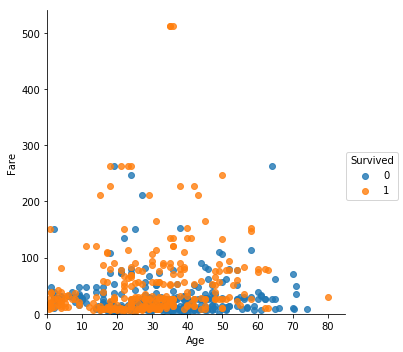

In [8]:
#Scatterplot
sns.lmplot(x='Age', y='Fare', data=df,
           fit_reg=False, # No regression line
           hue='Survived')   # Color by evolution stage)

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

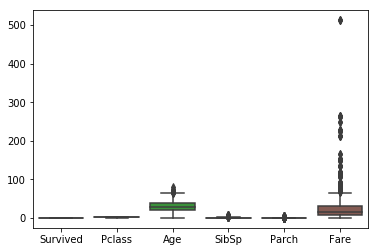

In [9]:
# Boxplot
sns.boxplot(data=df)
plt.show()

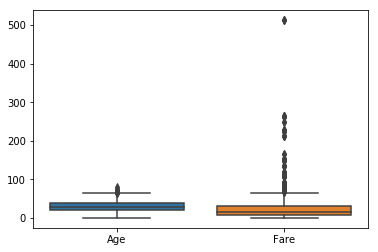

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Survived', 'Pclass', 'SibSp','Parch'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)
plt.show()

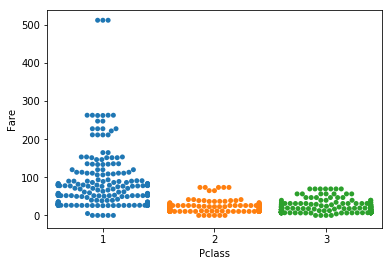

In [11]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Pclass', y='Fare', data=df)
plt.show()

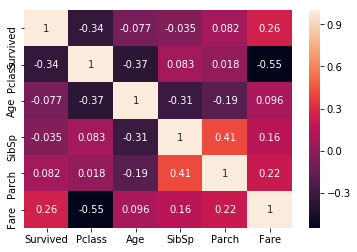

In [12]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df.corr(),
    #cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)
plt.show()

In [14]:
#Correlation of Survived with the other variables
df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

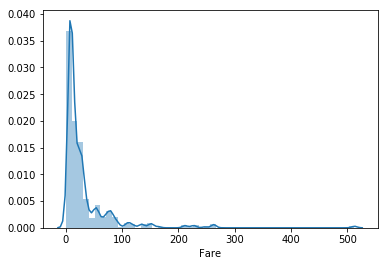

In [15]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Fare)
plt.show()

In [16]:
# Count Plot (a.k.a. Bar Plot)
ax = sns.countplot(y='Embarked', data=df)
# Rotate x-labels
#plt.xticks(rotation=-45)

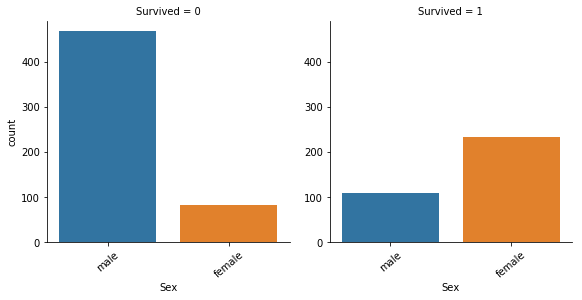

In [17]:
cat_features = df.select_dtypes(include=[object,'int'])

for col in cat_features.columns:
    if df[col].nunique() in range(2,20):
        #ax = sns.countplot(x=col, data=df_alerts_window)
        ax = sns.factorplot(x=col, col="Survived",data=df,
                   kind="count")
        #ax = sns.factorplot(y=col, col="Survived",data=df,
        #           kind="count")
        ax.set_xticklabels(rotation=40)
        #for p in ax.patches:
        #    ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        #plt.tight_layout()
        plt.show()

In [18]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

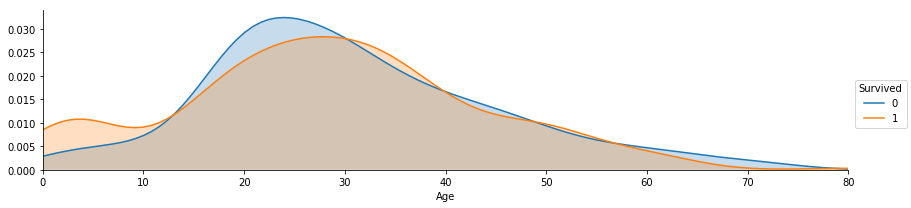

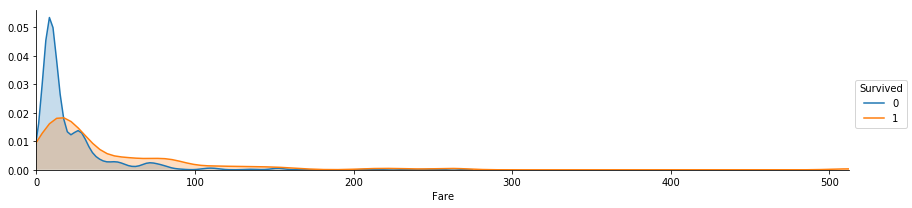

In [19]:
df_numerical = df.dropna(how='all', axis='columns').select_dtypes(include=['floating'])
for col in df_numerical.columns:
        plot_distribution(df, var = col , target = 'Survived')

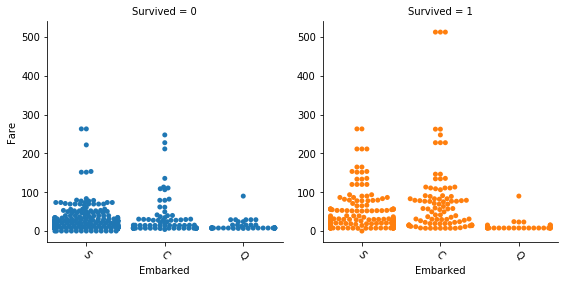

In [20]:
# Factor Plot
g = sns.factorplot(x='Embarked', 
                   y='Fare', 
                   data=df, 
                   hue='Survived',  # Color by stage
                   col='Survived',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
plt.show()

# Missing values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [22]:
proportion_nulls = df.isnull().sum()/len(df)
prop_nulls_df = []
for i in range(len(proportion_nulls)):
    prop_nulls_df.append([df.columns[i], proportion_nulls[i]])
prop_nulls_df

[['Survived', 0.0],
 ['Pclass', 0.0],
 ['Name', 0.0],
 ['Sex', 0.0],
 ['Age', 0.19865319865319866],
 ['SibSp', 0.0],
 ['Parch', 0.0],
 ['Ticket', 0.0],
 ['Fare', 0.0],
 ['Cabin', 0.77104377104377109],
 ['Embarked', 0.0022446689113355782]]

In [23]:
(df.isnull().sum()/len(df))

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

## Dropping columns with NAs

Strategy 1: Drop columns with any null values

In [24]:
# drop all columns with any null values; can set how = 'all' to remove only the columns where all values are null
df.dropna(axis='columns', how = 'any').head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  SibSp  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris    male      1   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1   
3                                       Heikkinen, Miss. Laina  female      0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1   
5                                     Allen, Mr. William Henry    male      0   

             Parch            Ticket     Fare  
PassengerId                                    
1                0         A/5 21171   7.2500  
2                0          PC 17599  71.2833  
3                0  STON/O2. 3101282   7.9250  
4                0            113803  53.1000  
5                0            373450   8.0500

Strategy 2: Drop columns with ALL null values

In [25]:
# drop all columns with any null values; can set how = 'all' to remove only the columns where all values are null
df.dropna(axis='columns', how = 'all').head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [26]:
# drop all columns with any null values; can set how = 'all' to remove only the columns where all values are null
df.dropna(axis='columns', how = 'any').head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  SibSp  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris    male      1   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1   
3                                       Heikkinen, Miss. Laina  female      0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1   
5                                     Allen, Mr. William Henry    male      0   

             Parch            Ticket     Fare  
PassengerId                                    
1                0         A/5 21171   7.2500  
2                0          PC 17599  71.2833  
3                0  STON/O2. 3101282   7.9250  
4                0            113803  53.1000  
5                0            373450   8.0500

Strategy 3: If $(100*t)$% values are null, drop the column

In [27]:
t = 0.7
df.dropna(axis='columns', thresh=int(len(df)*(1-t))).head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Embarked  
PassengerId                                                    
1                1      0         A/5 21171   7.2500        S  
2                1      0          PC 17599  71.2833        C  
3                0      0  STON/O2. 3101282   7.9250        S  
4                1      0            113803  53.1000        S  
5                0      0            373450   8.0500        S

## Frequency bins for categorical variables with many levels

In [28]:
def freq_bin(var,df1):
    bin_val_list = []
    for i in range(len(df1[var].dropna().unique())):
        freq = (df1[var].value_counts()/len(df1[var].dropna()))[i]
        print(freq)
        if freq > 0 and freq < 0.2:
            bin_val = 1
        if freq > 0.2 and freq < 0.4:
            bin_val = 2
        if freq > 0.4 and freq < 0.6:
            bin_val = 3
        if freq > 0.6 and freq < 0.8:
            bin_val = 4
        if freq > 0.8 and freq < 1.0:
            bin_val = 5
        bin_val_list.append(bin_val)
    bin_val_dict = dict(list(zip(list(df1[var].dropna().unique()), bin_val_list)))
    return(bin_val_dict)

Optimised function to create frequency bins

In [14]:
def freq_bin2(var,df1,num_bins=5):
    freq = (df1[var][df1[var].str.contains("nan") == False].value_counts()/len(df1[var][df1[var].str.contains("nan") == False]))
    bin_val_list = list(np.ceil(freq*num_bins))
    bin_val_list = [int(i) for i in bin_val_list]
    bin_val_dict = dict(list(zip(list(df1[var][df1[var].str.contains("nan") == False].unique()), bin_val_list)))
    return(bin_val_dict)
freq_bin2('Cabin',df.fillna('nan'),num_bins = 5)

{'A10': 1,
 'A14': 1,
 'A16': 1,
 'A19': 1,
 'A20': 1,
 'A23': 1,
 'A24': 1,
 'A26': 1,
 'A31': 1,
 'A32': 1,
 'A34': 1,
 'A36': 1,
 'A5': 1,
 'A6': 1,
 'A7': 1,
 'B101': 1,
 'B102': 1,
 'B18': 1,
 'B19': 1,
 'B20': 1,
 'B22': 1,
 'B28': 1,
 'B3': 1,
 'B30': 1,
 'B35': 1,
 'B37': 1,
 'B38': 1,
 'B39': 1,
 'B4': 1,
 'B41': 1,
 'B42': 1,
 'B49': 1,
 'B5': 1,
 'B50': 1,
 'B51 B53 B55': 1,
 'B57 B59 B63 B66': 1,
 'B58 B60': 1,
 'B69': 1,
 'B71': 1,
 'B73': 1,
 'B77': 1,
 'B78': 1,
 'B79': 1,
 'B80': 1,
 'B82 B84': 1,
 'B86': 1,
 'B94': 1,
 'B96 B98': 1,
 'C101': 1,
 'C103': 1,
 'C104': 1,
 'C106': 1,
 'C110': 1,
 'C111': 1,
 'C118': 1,
 'C123': 1,
 'C124': 1,
 'C125': 1,
 'C126': 1,
 'C128': 1,
 'C148': 1,
 'C2': 1,
 'C22 C26': 1,
 'C23 C25 C27': 1,
 'C30': 1,
 'C32': 1,
 'C45': 1,
 'C46': 1,
 'C47': 1,
 'C49': 1,
 'C50': 1,
 'C52': 1,
 'C54': 1,
 'C62 C64': 1,
 'C65': 1,
 'C68': 1,
 'C7': 1,
 'C70': 1,
 'C78': 1,
 'C82': 1,
 'C83': 1,
 'C85': 1,
 'C86': 1,
 'C87': 1,
 'C90': 1,
 'C91': 1,

In [11]:
df['Cabin'].fillna('nan')[df['Cabin'].str.contains("nan") == False]

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
22             D56
24              A6
28     C23 C25 C27
32             B78
53             D33
55             B30
56             C52
62             B28
63             C83
67             F33
76           F G73
89     C23 C25 C27
93             E31
97              A5
98         D10 D12
103            D26
111           C110
119        B58 B60
124           E101
125            D26
129          F E69
137            D47
138           C123
140            B86
149             F2
          ...     
752           E121
760            B77
764        B96 B98
766            D11
773            E77
777            F38
780             B3
782            B20
783             D6
790        B82 B84
797            D17
803        B96 B98
807            A36
810             E8
816           B102
821            B69
824           E121
830            B28
836            E49
840            C47
850            C92


For variables with too many categories, binning using frequency of category in data

In [30]:
var_ft_list = []
for col in df.describe(include=['O']).columns:
    if df[col].nunique() > 5:
        var_ft_list.append(col)
var_ft_list
for var in var_ft_list:
    print(var)
    bin_dict = freq_bin2(var,df,5)
    df[var] = df[var].map(bin_dict)

Name
Ticket
Cabin


Creating a dictionary to impute missing values by column, to pass into the `df.fillna` function 

In [31]:
sublist_dict = [( "Age",       df["Age"].mean() ),
                ( "Cabin",     'nan' ),
                ( "Embarked",  df["Embarked"].mode().iloc[0] )
               ]
sublist_dict

[('Age', 29.69911764705882), ('Cabin', 'nan'), ('Embarked', 'S')]

In [32]:
df = df.fillna(dict(sublist_dict))

Performs One-Hot encoding on the categorical variables in the data, dropping the first column to avoid linear dependence

In [33]:
df = pd.get_dummies(data = df, columns=df.describe(include=['O']).columns,drop_first=False)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Cabin_1.0     891 non-null uint8
Cabin_nan     891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(6), uint8(7)
memory usage: 68.7 KB


In [35]:
df.describe(include='all')

Survived      Pclass   Name         Age       SibSp       Parch  \
count  891.000000  891.000000  891.0  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    1.0   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.0   13.002015    1.102743    0.806057   
min      0.000000    1.000000    1.0    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    1.0   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.0   29.699118    0.000000    0.000000   
75%      1.000000    3.000000    1.0   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.0   80.000000    8.000000    6.000000   

       Ticket        Fare  Sex_female    Sex_male   Cabin_1.0   Cabin_nan  \
count   891.0  891.000000  891.000000  891.000000  891.000000  891.000000   
mean      1.0   32.204208    0.352413    0.647587    0.228956    0.771044   
std       0.0   49.693429    0.477990    0.477990    0.420397    0.420397   
min       1.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.0    7.910400    0.000000    0.000000    0.000000    1.000000   
50%       1.0   14.454200    0.000000    1.000000    0.000000    1.000000   
75%       1.0   31.000000    1.000000    1.000000    0.000000    1.000000   
max       1.0  512.329200    1.000000    1.000000    1.000000    1.000000   

       Embarked_C  Embarked_Q  Embarked_S  
count  891.000000  891.000000  891.000000  
mean     0.188552    0.086420    0.725028  
std      0.391372    0.281141    0.446751  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000

In [36]:
df = df.drop(df.columns[df.nunique() == 1],axis=1)

In [37]:
df.head(20)

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  \
PassengerId                                                                   
1                   0       3  22.000000      1      0   7.2500           0   
2                   1       1  38.000000      1      0  71.2833           1   
3                   1       3  26.000000      0      0   7.9250           1   
4                   1       1  35.000000      1      0  53.1000           1   
5                   0       3  35.000000      0      0   8.0500           0   
6                   0       3  29.699118      0      0   8.4583           0   
7                   0       1  54.000000      0      0  51.8625           0   
8                   0       3   2.000000      3      1  21.0750           0   
9                   1       3  27.000000      0      2  11.1333           1   
10                  1       2  14.000000      1      0  30.0708           1   
11                  1       3   4.000000      1      1  16.7000           1   
12                  1       1  58.000000      0      0  26.5500           1   
13                  0       3  20.000000      0      0   8.0500           0   
14                  0       3  39.000000      1      5  31.2750           0   
15                  0       3  14.000000      0      0   7.8542           1   
16                  1       2  55.000000      0      0  16.0000           1   
17                  0       3   2.000000      4      1  29.1250           0   
18                  1       2  29.699118      0      0  13.0000           0   
19                  0       3  31.000000      1      0  18.0000           1   
20                  1       3  29.699118      0      0   7.2250           1   

             Sex_male  Cabin_1.0  Cabin_nan  Embarked_C  Embarked_Q  \
PassengerId                                                           
1                   1          0          1           0           0   
2                   0          1          0           1           0   
3                   0          0          1           0           0   
4                   0          1          0           0           0   
5                   1          0          1           0           0   
6                   1          0          1           0           1   
7                   1          1          0           0           0   
8                   1          0          1           0           0   
9                   0          0          1           0           0   
10                  0          0          1           1           0   
11                  0          1          0           0           0   
12                  0          1          0           0           0   
13                  1          0          1           0           0   
14                  1          0          1           0           0   
15                  0          0          1           0           0   
16                  0          0          1           0           0   
17                  1          0          1           0           1   
18                  1          0          1           0           0   
19                  0          0          1           0           0   
20                  0          0          1           1           0   

             Embarked_S  
PassengerId              
1                     1  
2                     0  
3                     1  
4                     1  
5                     1  
6                     0  
7                     1  
8                     1  
9                     1  
10                    0  
11                    1  
12                    1  
13                    1  
14                    1  
15                    1  
16                    1  
17                    0  
18                    1  
19                    1  
20                    0

Producing the correlation matrix here gives more information than we had before transforming the variables

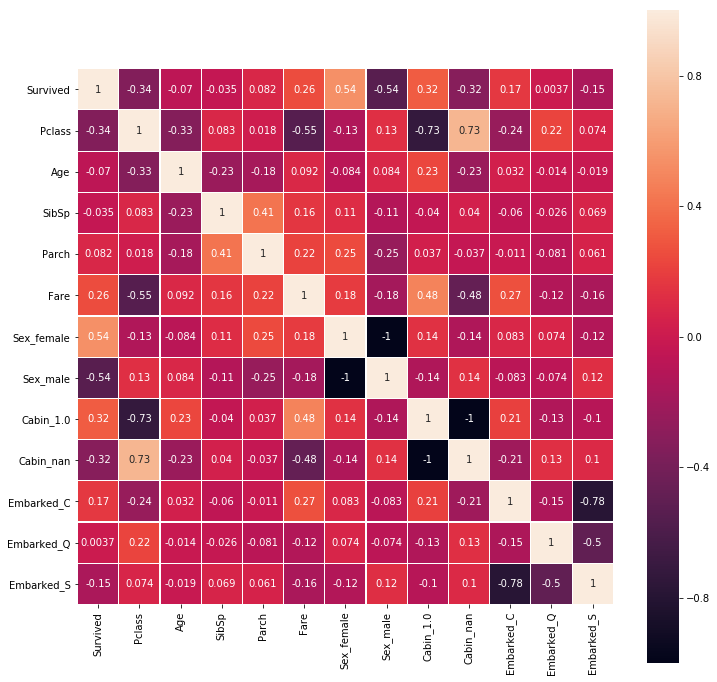

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df.corr(),
    #cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)
plt.show()

In [39]:
# shortlisted values
y = df['Survived']
#X = df['mainbank']
#X = df[event_cols].fillna(0)
#X = df[['high_risk_total_all_C7','stdev_cash_C28']].fillna(0)
X = df.drop('Survived', axis = 1)
print(X.shape)
print(y.shape)

(891, 12)
(891,)


# Downsampling code - use when the data is imbalanced

In [40]:
def downsample(X, y, minority_class_share=0.5,verbose=False):
    if minority_class_share > 1 or minority_class_share < 0:
        raise Exception ("Desired share of the minority class must be a number between 0 and 1")
    data_in = X.join(y)
    label = y.name
    n_positives = np.sum(y)
    n = int(n_positives * (1 - minority_class_share)/minority_class_share)
    
    if n > data_in[data_in[label]==0].shape[0]:
        raise Exception ('Desired share of the minority class is not possible to achieve by downsampling')
        
    out = pd.concat([data_in[data_in[label]==1], data_in[data_in[label]==0].sample(n=n)])
    out.reset_index(drop = True)
    out_X, out_y = out[out.columns[:-1]], out[label]
    
    return out_X, out_y

# Models

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (learning_curve,
                                     train_test_split,
                                     ShuffleSplit,
                                     KFold,
                                     StratifiedKFold,
                                     GridSearchCV)
from sklearn.metrics import (make_scorer,
                            recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            accuracy_score,
                            roc_curve, 
                            auc,
                            confusion_matrix
                            )
from scipy import interp

In [42]:
# train-test split (select holdout for testing - before downsampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [43]:
# quick testing of the classifier (no CV)
clf = RandomForestClassifier(random_state=1, max_depth = 25)

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation metrics

In [44]:
print('F1-score:', f1_score(y_true = y_test, y_pred=y_pred))
print('Recall:', recall_score(y_true = y_test, y_pred=y_pred))
print('Accuracy:', accuracy_score(y_true = y_test, y_pred=y_pred))
print('Precision:', precision_score(y_true = y_test, y_pred=y_pred))

F1-score: 0.786206896552
Recall: 0.77027027027
Accuracy: 0.826815642458
Precision: 0.802816901408


## Learning Curve

In [45]:
# define function to plot test and training curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

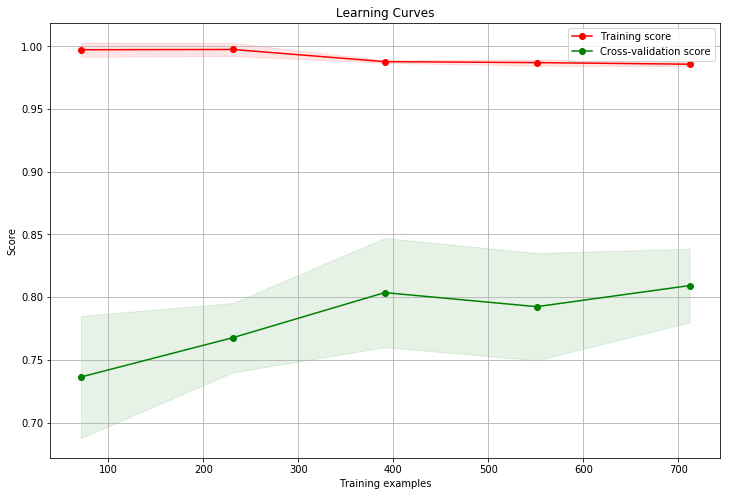

In [46]:
title = 'Learning Curves'
cv = KFold(n_splits = 5, random_state = 0)
scorer = make_scorer(recall_score)
clf1 = RandomForestClassifier(random_state=42,max_depth= 25, max_features= 0.5, min_samples_split= 2, n_estimators= 50)
plot_learning_curve(clf1, title, X, y, cv = cv, n_jobs=4)
plt.show()

## ROC Curve

In [47]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(random_state=1)

def plot_roc_curve(X, y, cv, resampling=None):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    plt.figure(figsize=(12,8))
    for train, test in cv.split(X, y):
        if resampling == None:
            X_train_d, y_train_d = X.iloc[train], y.iloc[train]
        else:
            X_train_d, y_train_d = downsample(X.iloc[train], y.iloc[train], 0.4)
        probas_ = classifier.fit(X_train_d, y_train_d).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')


    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
plot_roc_curve(X, y, cv, resampling=None)

# Feature importance

In [49]:
#  Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

In [50]:
# Visualisation of feature importances

std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 1 (0.248630)
2. feature 4 (0.228754)
3. feature 6 (0.163046)
4. feature 5 (0.116930)
5. feature 0 (0.076725)
6. feature 2 (0.042711)
7. feature 3 (0.035132)
8. feature 8 (0.031590)
9. feature 7 (0.019827)
10. feature 9 (0.019805)
11. feature 11 (0.011088)
12. feature 10 (0.005761)


# Partial Dependence Plots

Documentation: https://github.com/SauceCat/PDPbox/blob/master/parameter.md

In [51]:
import pdpbox

In [52]:
from pdpbox import pdp
# for binary feature
pdp_sex = pdp.pdp_isolate(clf, df.drop('Survived', axis=1), 'Sex_male')

# for onehot encoding feature
pdp_embark = pdp.pdp_isolate(clf, df.drop('Survived', axis=1), ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

# for numeric feature
pdp_fare = pdp.pdp_isolate(clf, df.drop('Survived', axis=1), 'Fare')

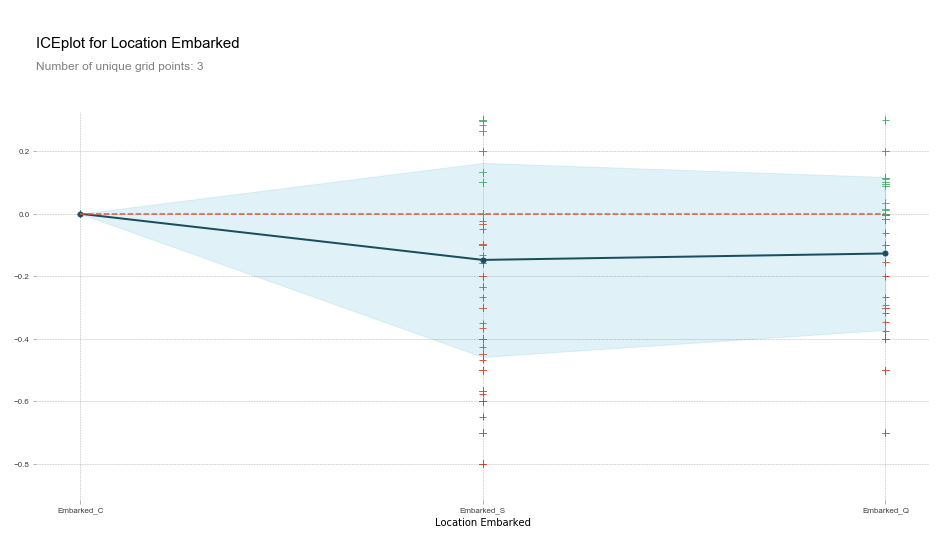

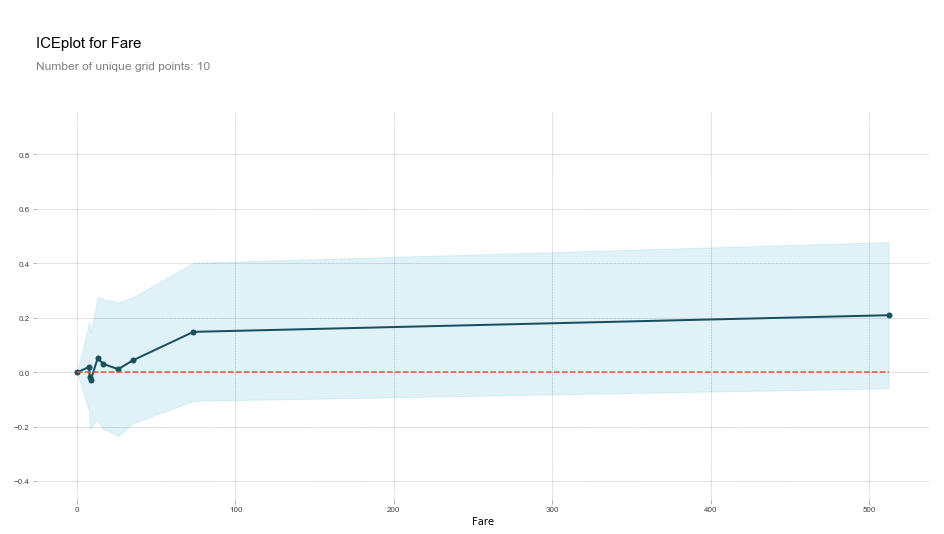

In [53]:
pdp.pdp_plot(pdp_sex, 'sex')
pdp.pdp_plot(pdp_embark, 'Location Embarked', plot_org_pts=True)
pdp.pdp_plot(pdp_fare, 'Fare')

# Tree interpreter

https://github.com/fastai/fastai/blob/master/courses/ml1/lesson2-rf_interpretation.ipynb

In [55]:
from treeinterpreter import treeinterpreter as ti

In [91]:
prediction, bias, contributions=  ti.predict(clf, X_test)

In [104]:
df.drop('Survived', axis=1).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_1.0', 'Cabin_nan', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [94]:
for i in range(len(X_test)):
    print ("Instance", i)
    print ("Likelihood of being in Class 1: ", prediction[i][1])
    print ("Bias (trainset mean)", bias[i][1])
    print ("Feature contributions:")
    for c, feature in sorted(zip([w[1] for w in contributions[i]], 
                                 df.drop('Survived', axis=1).columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 5))
    print ("-"*20)

Instance 0
Likelihood of being in Class 1:  0.6
Bias (trainset mean) 0.374578651685
Feature contributions:
Fare 0.25538
Embarked_C 0.13762
Parch 0.12548
Age -0.12433
Sex_female -0.07717
Sex_male -0.06133
Cabin_nan -0.05927
Embarked_Q 0.01999
Cabin_1.0 -0.01605
Pclass 0.01565
SibSp 0.00804
Embarked_S 0.00141
--------------------
Instance 1
Likelihood of being in Class 1:  0.0
Bias (trainset mean) 0.374578651685
Feature contributions:
Sex_male -0.16638
Age -0.11619
Pclass 0.07187
Sex_female -0.0706
Cabin_nan -0.03636
Cabin_1.0 -0.03052
Fare -0.02676
SibSp 0.01113
Embarked_C -0.00628
Parch -0.00453
Embarked_Q 0.0014
Embarked_S -0.00133
--------------------
Instance 2
Likelihood of being in Class 1:  0.133333333333
Bias (trainset mean) 0.374578651685
Feature contributions:
Sex_male -0.07058
Age -0.05049
Sex_female -0.04827
Pclass -0.04806
Fare 0.0381
Cabin_nan -0.02158
SibSp -0.01426
Cabin_1.0 -0.00949
Embarked_C -0.00871
Embarked_S -0.00441
Parch -0.00244
Embarked_Q -0.00105
-------------

Cabin_nan 0.07315
Cabin_1.0 0.06196
SibSp 0.03038
Age 0.00878
Embarked_S 0.00392
Parch 0.00334
Embarked_C -0.00051
Embarked_Q -8e-05
--------------------
Instance 70
Likelihood of being in Class 1:  1.0
Bias (trainset mean) 0.374578651685
Feature contributions:
Sex_male 0.25864
Pclass 0.21583
Sex_female 0.12661
Parch 0.06657
Cabin_1.0 -0.02942
Fare 0.02558
Age -0.02231
Cabin_nan -0.02189
SibSp 0.00902
Embarked_C -0.00403
Embarked_S 0.00063
Embarked_Q 0.00017
--------------------
Instance 71
Likelihood of being in Class 1:  0.9
Bias (trainset mean) 0.374578651685
Feature contributions:
Sex_female 0.19551
Sex_male 0.11292
Cabin_nan 0.0763
Pclass 0.07486
Cabin_1.0 0.06196
Parch -0.03388
Fare 0.03184
SibSp 0.00305
Age 0.00166
Embarked_C 0.00154
Embarked_S -0.00034
Embarked_Q 0.0
--------------------
Instance 72
Likelihood of being in Class 1:  0.9
Bias (trainset mean) 0.374578651685
Feature contributions:
Sex_female -0.16924
Fare 0.16886
Embarked_C 0.165
Age 0.12226
Cabin_nan 0.11186
Parch

Bias (trainset mean) 0.374578651685
Feature contributions:
Fare 0.25538
Embarked_C 0.13762
Parch 0.12548
Age -0.12433
Sex_female -0.07717
Sex_male -0.06133
Cabin_nan -0.05927
Embarked_Q 0.01999
Cabin_1.0 -0.01605
Pclass 0.01565
SibSp 0.00804
Embarked_S 0.00141
--------------------
Instance 132
Likelihood of being in Class 1:  0.0
Bias (trainset mean) 0.374578651685
Feature contributions:
Sex_male -0.12839
Fare -0.09421
Sex_female -0.0706
Cabin_nan -0.02922
Cabin_1.0 -0.02025
Age -0.01666
Pclass -0.00794
Embarked_C -0.00545
Parch -0.00528
SibSp 0.00519
Embarked_S -0.00299
Embarked_Q 0.00122
--------------------
Instance 133
Likelihood of being in Class 1:  0.9
Bias (trainset mean) 0.374578651685
Feature contributions:
Age 0.38829
Sex_male 0.17663
Pclass -0.14853
Sex_female 0.11018
SibSp 0.06674
Fare 0.05593
Cabin_nan -0.03217
Embarked_S -0.02602
Embarked_C -0.02181
Cabin_1.0 -0.01913
Embarked_Q -0.0151
Parch -0.00959
--------------------
Instance 134
Likelihood of being in Class 1:  0.9